In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import numpy
import calendar

#plt.rcParams['figure.figsize'] = (10, 7)
#plt.style.use('seaborn-white')


In [31]:
Store_Region= pd.read_csv('C:\\Location.csv')
TransacTkwy_data= pd.read_csv('C:\\Store.data.csv', encoding='latin1')
Store_Data = pd.merge(Store_Region, TransacTkwy_data, on='Franchise ID')
Store_Data['Turnover']=Store_Data[Store_Data.columns[6:7]].replace('[\£,]', '', regex=True).astype(float)
Store_Data['Gross Profit']=Store_Data[Store_Data.columns[7:]].replace('[\£,]', '', regex=True).astype(float)
Store_Data['Price']=Store_Data[Store_Data.columns[8:]].replace('[\£,]', '', regex=True).astype(float)
Store_Data['Year'] = pd.to_datetime(Store_Data['Year'], format="%Y") 
Store_Data['Month'] = pd.to_datetime(Store_Data['Month'], format='%m') 
Store_Data['Turnover'] = Store_Data['Turnover'].astype('float64')
Store_Data['Gross Profit'] = Store_Data['Gross Profit'].astype('float64')
Store_Data['Units Sold'] = Store_Data['Units Sold'].str.replace(',', '').astype(int)
Store_Data['Year'] = Store_Data['Year'].dt.year
Store_Data['Month'] = Store_Data['Month'].dt.month
Store_Data['Month'] = Store_Data['Month'].apply(lambda x: calendar.month_abbr[x])
pd.set_option('display.float_format','{:.0f}'.format)

In [32]:
Store_Data.head(5)

,Franchise ID,Region,Product,Year,Month,Units Sold,Turnover,Gross Profit,Unit Price,Price
0,291119,South East,Kebab,2016,Jan,3059,11000,682,3.60,4
1,291119,South East,Burger,2016,Jan,116,171,-54,£1.47,1
2,291119,South East,Pizza,2016,Jan,9276,165640,6416,£17.86,18
3,291119,South East,Chips,2016,Jan,89345,27594,2009,£0.31,0
4,291119,South East,Kebab,2016,Feb,2633,5900,304,£2.24,2




### Year on Year Performance: Turnover and Gross Profit




In [59]:
Purchases = Store_Data["Franchise ID"].count()
 
Store_Data_Group= Store_Data.groupby(['Product','Year'])
Store_Data_Group_Stat = pd.DataFrame(Store_Data_Group["Product"].count())
Store_Data_Group_Stat = Store_Data_Group_Stat.rename(columns = { "Product": "Count"}) 

#Percents of Desc Purchase
#Store_Data_Group_Stat["Percent"] = round( Store_Data_Group_Stat["Count"] / Purchases  * 100,1) 

#Average purchase price
Store_Data_Group_Stat["Total Units Sold"]=round(Store_Data_Group["Units Sold"].sum(),2) 

Store_Data_Group_Stat["Total Turnover "]=round(Store_Data_Group["Turnover"].sum(),2) 
Store_Data_Group1 = Store_Data_Group.agg({'Turnover': 'sum'})
Product_Group = Store_Data.groupby(['Product']).agg({'Turnover': 'sum'})
Store_Data_Group_Stat["Total Turnover (%) "]=Store_Data_Group1.div(Product_Group, level='Product') * 100
Store_Data_Group_Stat

# TotaL Turnover and percentage across product group and year
Store_Data_Group_Stat["Total Gross "]=round(Store_Data_Group["Gross Profit"].sum(),2) 
Store_Data_Group1 = Store_Data_Group.agg({'Gross Profit': 'sum'})
Product_Group = Store_Data.groupby(['Product']).agg({'Gross Profit': 'sum'})
Store_Data_Group_Stat["Total Gross Profit (%) "]=Store_Data_Group1.div(Product_Group, level='Product') * 100

# Price Per unit
Total_Units_Sold = Store_Data["Units Sold"].sum()
Total_Revenue = Store_Data["Units Sold"].sum()

#Store_Data_Group_Stat['Unite Cost Price']=Store_Data_Group_Stat["Total Turnover"] /Store_Data_Group_Stat["Total Units Sold"]




In [60]:
Store_Data_Group_Stat

Count  Total Units Sold  Total Turnover   Total Turnover (%)   \
Product Year                                                                  
Burger  2016   5345           4302351          6556029                   66   
        2017   5066           3149983          3409273                   34   
Chips   2016   5352         249195063        128900448                   45   
        2017  10271         257413540        155514765                   55   
Kebab   2016   5352          14943200         74428770                   50   
        2017   5352          14446511         74153484                   50   
Pizza   2016   5352          90092798       1419011059                   50   
        2017   5352          89346821       1430161248                   50   

              Total Gross   Total Gross Profit (%)   
Product Year                                         
Burger  2016        415360                       66  
        2017        209674                       34  
Chips   2016      10246491                       43  
        2017      13715453                       57  
Kebab   2016       3239611                       52  
        2017       2991022                       48  
Pizza   2016      38525354                       50  
        2017      38377842                       50



### Year on Year performance





In [61]:
Group_Yr =Store_Data.groupby(['Year'])['Units Sold','Turnover','Gross Profit'].agg(np.sum)
Group_Yr['Turnover'] = Group_Yr['Turnover'].map('${:,.2f}'.format)
Group_Yr['Gross Profit'] = Group_Yr['Gross Profit'].map('${:,.2f}'.format)


# 1 billion, 
# Diff 34 Million
# Diff 3m GP
# Diff Unite Sold 5m

<ipython-input-61-4c230960b4fe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Group_Yr =Store_Data.groupby(['Year'])['Units Sold','Turnover','Gross Profit'].agg(np.sum)


In [62]:
Group_Yr

,Units Sold,Turnover,Gross Profit
Year,,,
2016,358533412,"$1,628,896,306.00","$52,426,816.00"
2017,364356855,"$1,663,238,770.00","$55,293,991.00"


<ipython-input-50-7b29cb80d297>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax=Store_Data.groupby(['Year'])['Units Sold','Turnover','Gross Profit'].sum().plot(kind='bar', figsize=(20, 12))


Text(0.5, 0.98, 'Year on Year Performance (2016-2017 )')

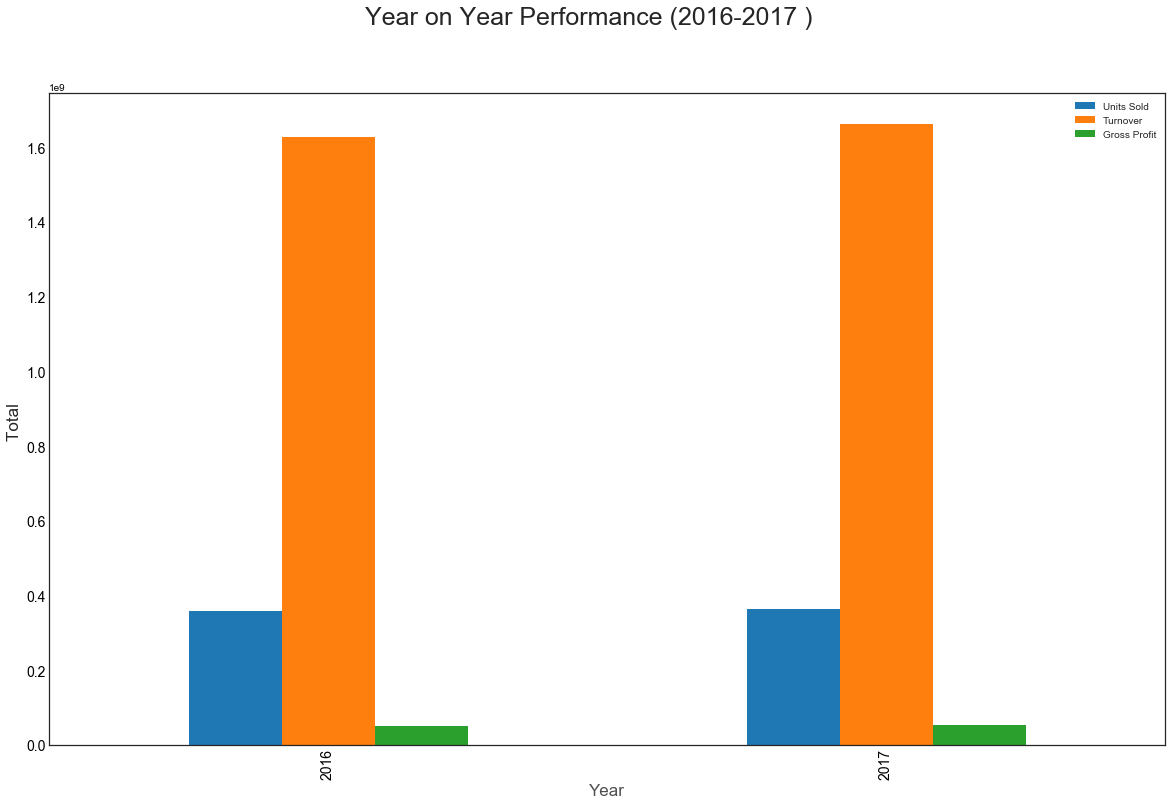

In [50]:
ax=Store_Data.groupby(['Year'])['Units Sold','Turnover','Gross Profit'].sum().plot(kind='bar', figsize=(20, 12))

ax.set_xlabel("")
# Set the label for the y-axis
ax.set_ylabel("Total ", fontname="Arial", fontsize=17)
ax.set_xlabel("Year", fontname="Arial", fontsize=17, alpha=50)

ax.xaxis.set_tick_params(labelsize=14, colors='black')
ax.yaxis.set_tick_params(labelsize=14, colors='black')
plt.legend(fontsize=5) # using a size in points
plt.legend(fontsize="medium")

plt.suptitle('Year on Year Performance (2016-2017 )', fontsize=25)

<ipython-input-37-e5a08169c694>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax=Store_Data.groupby(['Month'])['Units Sold','Turnover','Gross Profit'].sum().sort_values('Gross Profit', ascending = False).plot(kind='bar', figsize=(20, 12))


Text(0.5, 0.98, 'Business KPI Across Month (2016-2017 )')

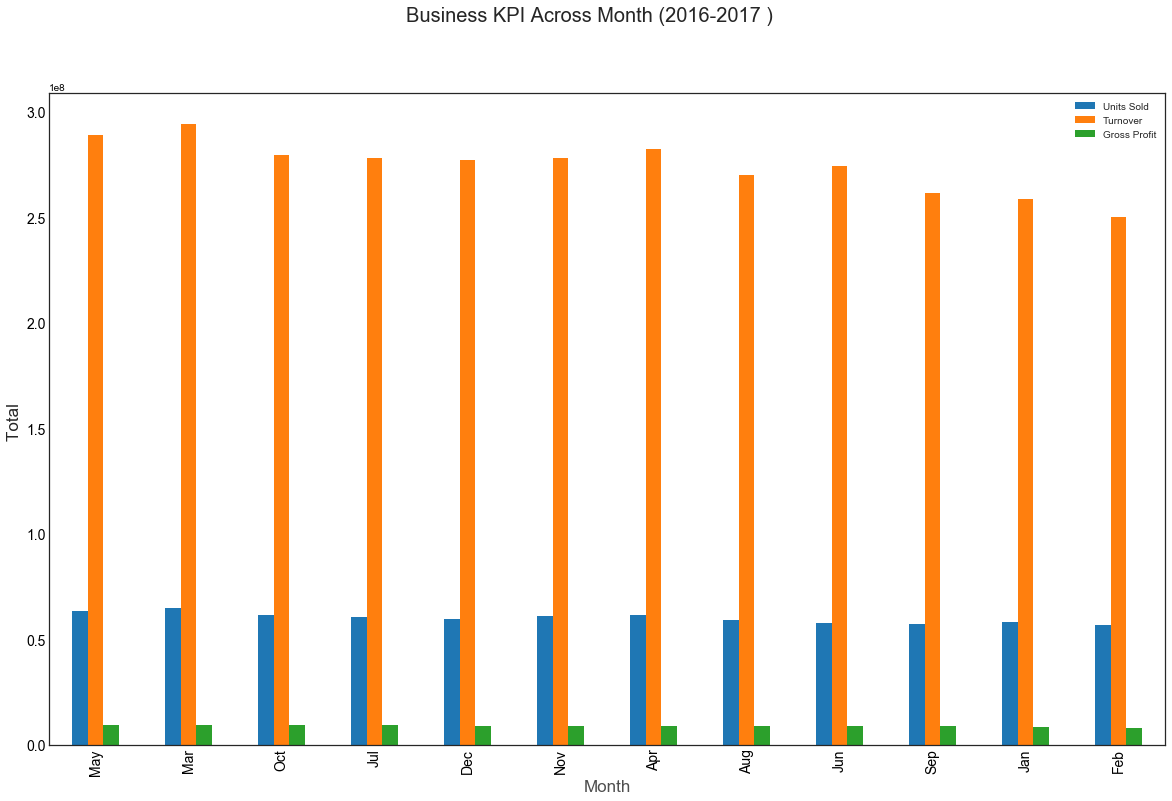

In [37]:
ax=Store_Data.groupby(['Month'])['Units Sold','Turnover','Gross Profit'].sum().sort_values('Gross Profit', ascending = False).plot(kind='bar', figsize=(20, 12))

ax.set_xlabel("")
# Set the label for the y-axis
ax.set_ylabel("Total ", fontname="Arial", fontsize=17)
ax.set_xlabel("Month", fontname="Arial", fontsize=17, alpha=50)

ax.xaxis.set_tick_params(labelsize=14, colors='black')
ax.yaxis.set_tick_params(labelsize=14, colors='black')
plt.legend(fontsize=5) # using a size in points
plt.legend(fontsize="medium")

plt.suptitle('Business KPI Across Month (2016-2017 )', fontsize=20)




### Regions with largest turnover, gross profit and total units sold  





<ipython-input-56-779245fa080b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax=Store_Data.groupby(['Region'])['Units Sold','Turnover','Gross Profit'].sum().sort_values('Turnover', ascending = False).plot(kind='bar', figsize=(20, 12))


Text(0.5, 0.98, 'Regions Performance Across Business KPI (2016-2017 )')

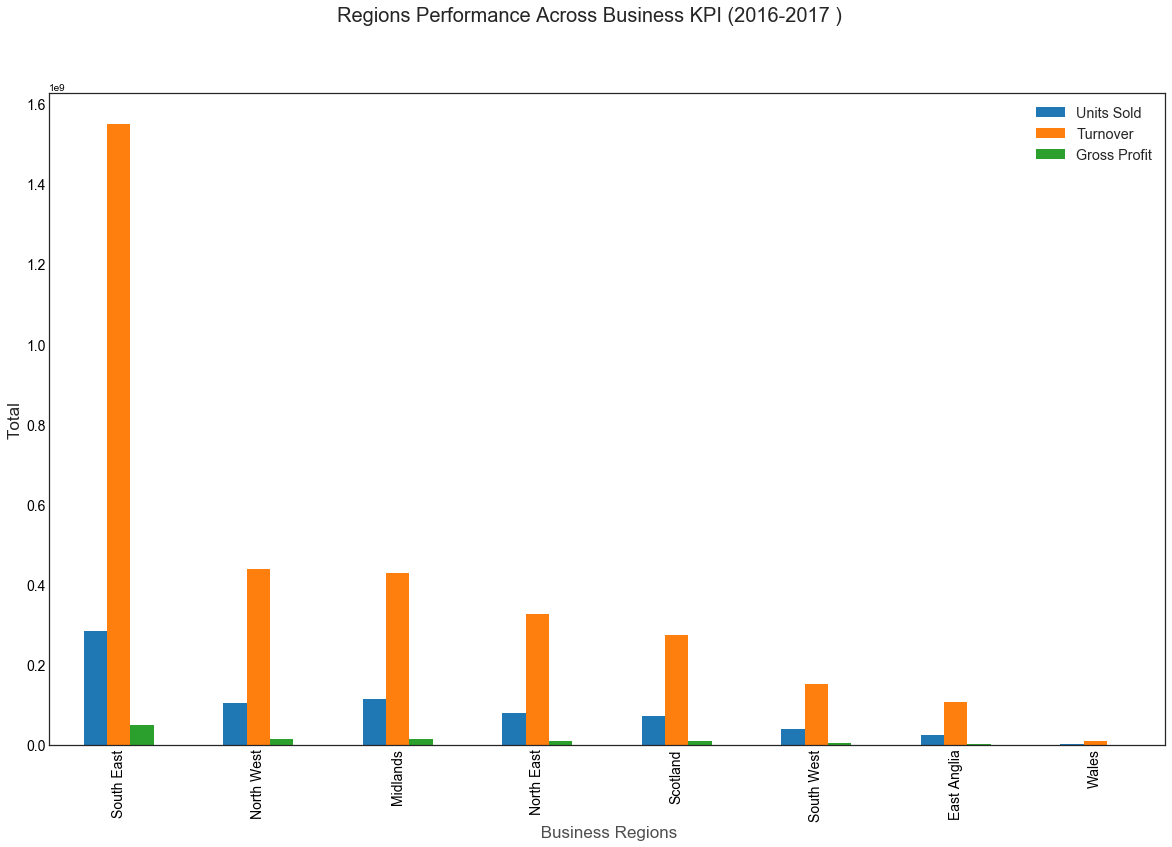

In [56]:

ax=Store_Data.groupby(['Region'])['Units Sold','Turnover','Gross Profit'].sum().sort_values('Turnover', ascending = False).plot(kind='bar', figsize=(20, 12))



#.sum()['Turnover'].unstack().plot(kind='bar', figsize=(17, 8))

ax.set_xlabel("")
# Set the label for the y-axis
ax.set_ylabel("Total", fontname="Arial", fontsize=17)
ax.set_xlabel(" Business Regions", fontname="Arial", fontsize=17, alpha=50)

ax.xaxis.set_tick_params(labelsize=14, colors='black')
ax.yaxis.set_tick_params(labelsize=14, colors='black')
plt.legend(fontsize=5) # using a size in points
plt.legend(fontsize="x-large")

plt.suptitle('Regions Performance Across Business KPI (2016-2017 )', fontsize=20)


### Gross profits by regions and product Cateogry 

Text(0.5, 0.98, 'Gross Profit By Regions and Product Category (2016-2017 )')

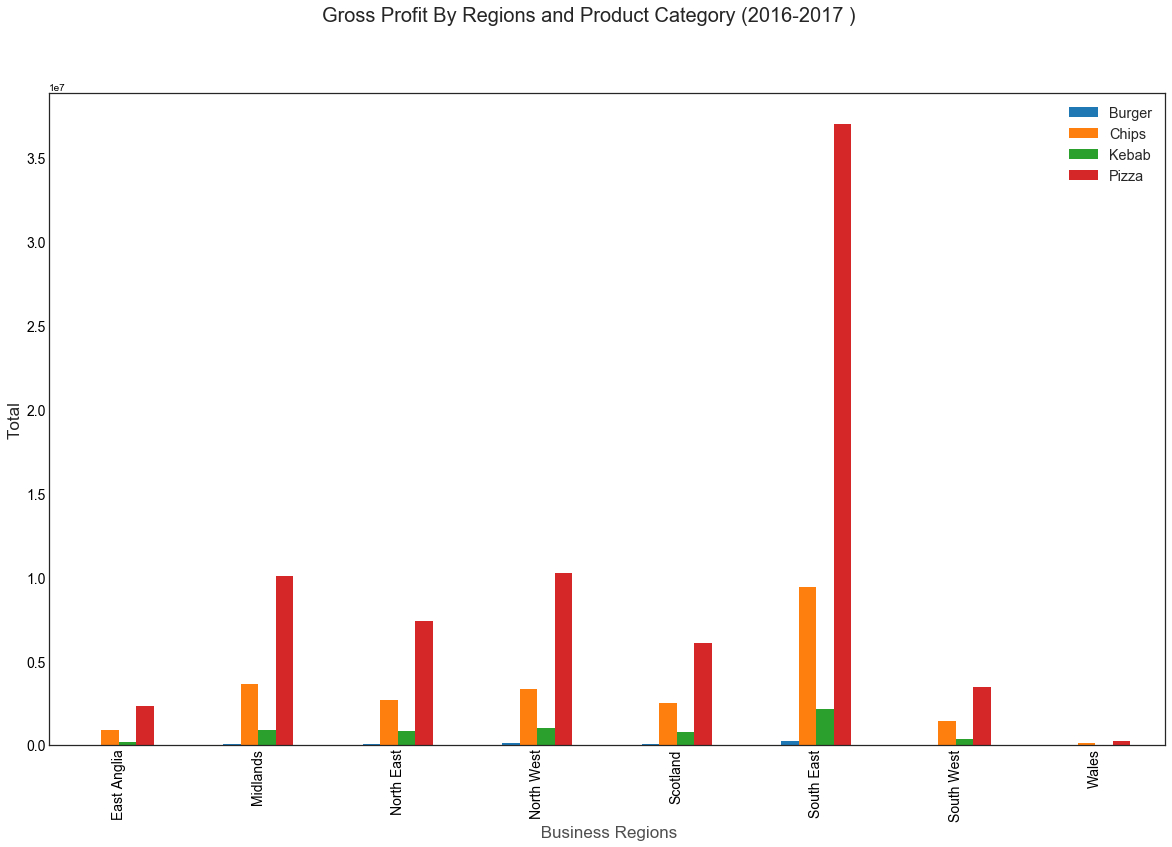

In [57]:
ax=Store_Data.groupby(['Region','Product']).sum()['Gross Profit'].unstack().plot(kind='bar', figsize=(20, 12))

ax.set_xlabel("")
# Set the label for the y-axis
ax.set_ylabel("Total", fontname="Arial", fontsize=17)
ax.set_xlabel(" Business Regions", fontname="Arial", fontsize=17, alpha=50)

ax.xaxis.set_tick_params(labelsize=14, colors='black')
ax.yaxis.set_tick_params(labelsize=14, colors='black')
plt.legend(fontsize=5) # using a size in points
plt.legend(fontsize="x-large")

plt.suptitle('Gross Profit By Regions and Product Category (2016-2017 )', fontsize=20)


###  Regions with the largest profit by product category

Text(0.5, 0.98, 'Total Turnover By Regions and Product Category(2016-2017 )')

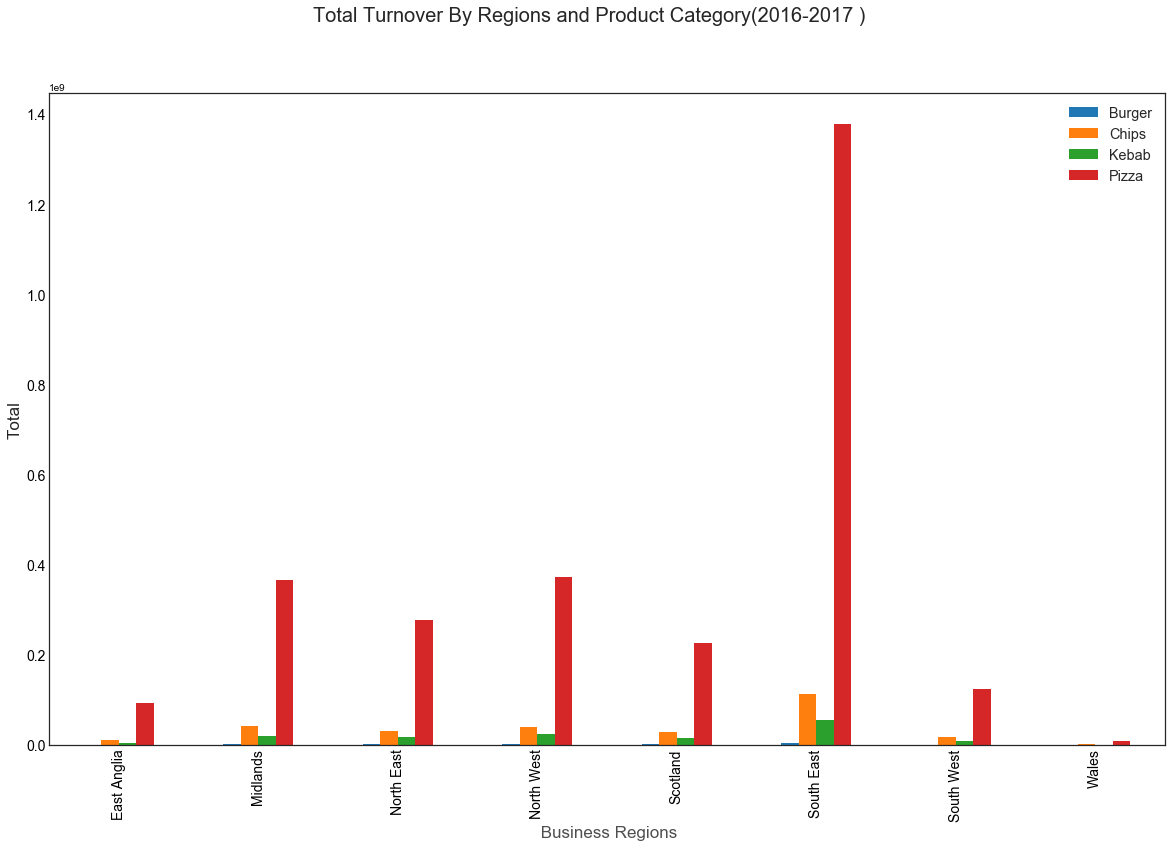

In [54]:
ax=Store_Data.groupby(['Region','Product']).sum()['Turnover'].unstack().plot(kind='bar', figsize=(20, 12))

ax.set_xlabel("")
# Set the label for the y-axis
ax.set_ylabel("Total", fontname="Arial", fontsize=17)
ax.set_xlabel(" Business Regions", fontname="Arial", fontsize=17, alpha=50)

ax.xaxis.set_tick_params(labelsize=14, colors='black')
ax.yaxis.set_tick_params(labelsize=14, colors='black')
plt.legend(fontsize=5) # using a size in points
plt.legend(fontsize="x-large")

plt.suptitle('Total Turnover By Regions and Product Category(2016-2017 )', fontsize=20)







### Avg price by region and product category

Text(0.5, 0.98, 'Average Price By Regions and Product Category(2016-2017 )')

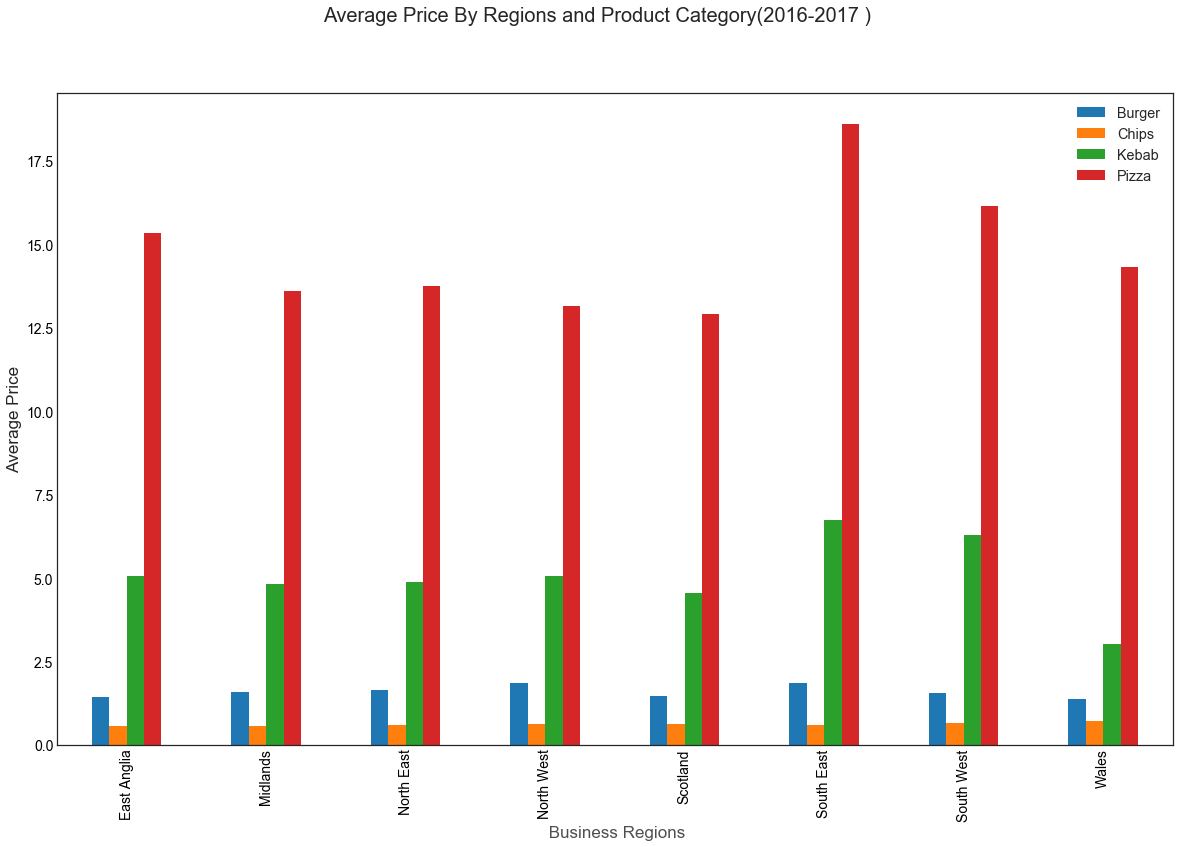

In [55]:




ax=Store_Data.groupby(['Region','Product']).mean()['Price'].unstack().plot(kind='bar', figsize=(20, 12))

ax.set_xlabel("")
# Set the label for the y-axis
ax.set_ylabel("Average Price", fontname="Arial", fontsize=17)
ax.set_xlabel(" Business Regions", fontname="Arial", fontsize=17, alpha=50)

ax.xaxis.set_tick_params(labelsize=14, colors='black')
ax.yaxis.set_tick_params(labelsize=14, colors='black')
plt.legend(fontsize=5) # using a size in points
plt.legend(fontsize="x-large")

plt.suptitle('Average Price By Regions and Product Category(2016-2017 )', fontsize=20)

Text(0.5, 0.98, 'Turnover By Month (2016-2017)')

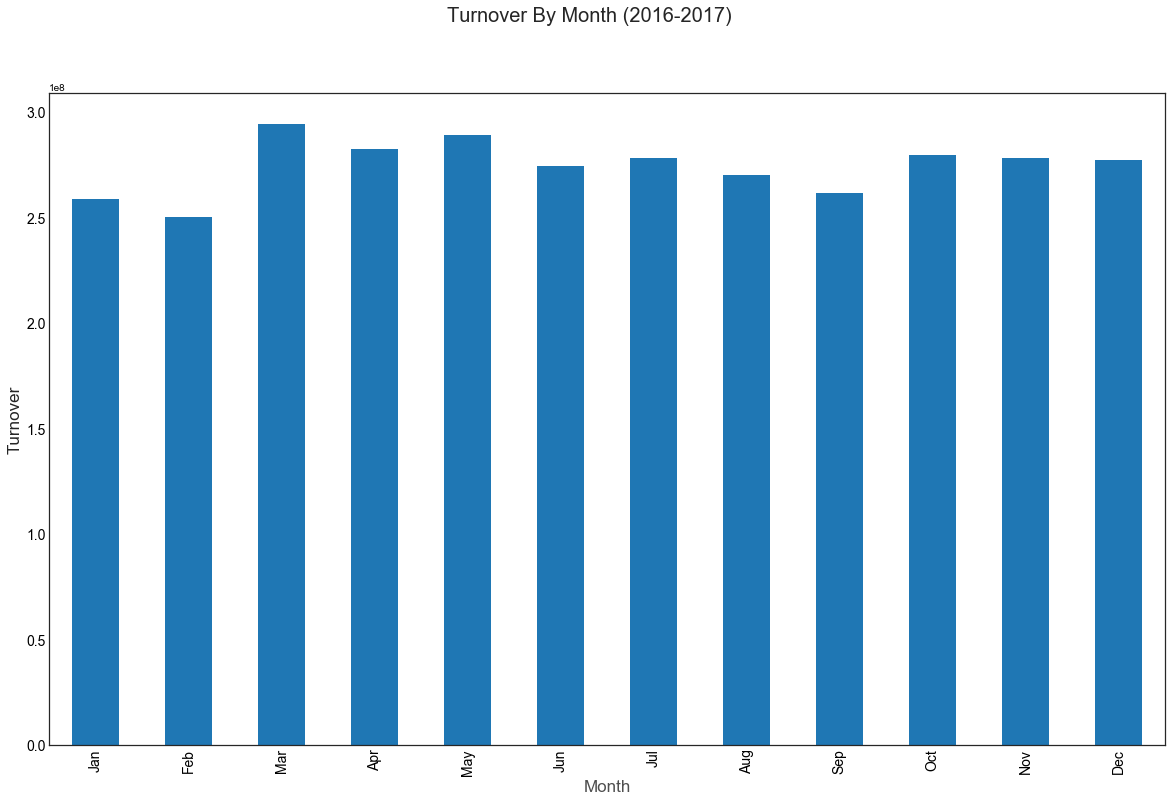

In [49]:


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Store_Data['Month'] = pd.Categorical(Store_Data['Month'], categories=months, ordered=True)


ax=Store_Data.sort_values('Month', ascending = True).groupby(['Month'])['Turnover'].sum().plot(kind='bar', figsize=(20, 12))

ax.set_xlabel("")
# Set the label for the y-axis
ax.set_ylabel("Turnover", fontname="Arial", fontsize=17)
ax.set_xlabel("Month", fontname="Arial", fontsize=17, alpha=50)

ax.xaxis.set_tick_params(labelsize=14, colors='black')
ax.yaxis.set_tick_params(labelsize=14, colors='black')

plt.suptitle('Turnover By Month (2016-2017)', fontsize=20)

#Store_Data.groupby(['Month','Product']).mean()['Turnover'].unstack().plot()



